In [5]:
# Principal Component Analysis

import pandas as pd
pd.set_option('display.max_columns', 6)
pd.options.display.width = 120

from sklearn.decomposition import PCA
import seaborn
from matplotlib import pyplot as plt
from nlpia.data.loaders import get_data

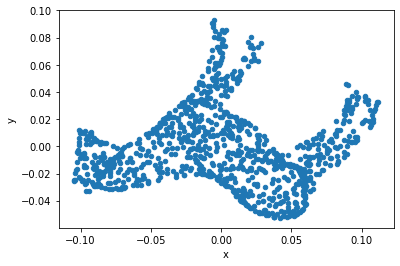

In [4]:
df = get_data('pointcloud').sample(1000)
pca = PCA(n_components=2)
df2d = pd.DataFrame(pca.fit_transform(df), columns=list('xy'))
df2d.plot(kind='scatter', x='x', y='y')
plt.show()

In [6]:
from nlpia.data.loaders import get_data
sms = get_data('sms-spam')

In [8]:
index = ['sms{}{}'.format(i, '!'*j) for (i,j) in zip(range(len(sms)), sms.spam)] 
sms.index = index
sms.head(6)

,spam,text
sms0,0,"Go until jurong point, crazy.. Available only ..."
sms1,0,Ok lar... Joking wif u oni...
sms2!,1,Free entry in 2 a wkly comp to win FA Cup fina...
sms3,0,U dun say so early hor... U c already then say...
sms4,0,"Nah I don't think he goes to usf, he lives aro..."
sms5!,1,FreeMsg Hey there darling it's been 3 week's n...


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize
tfidf = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs = tfidf.fit_transform(raw_documents=sms.text).toarray()
len(tfidf.vocabulary_)

tfidf_docs = pd.DataFrame(tfidf_docs)
tfidf_docs = tfidf_docs - tfidf_docs.mean()
tfidf_docs.shape

(4837, 9232)

In [9]:
sms.spam.sum()

638

In [12]:
pca = PCA(n_components=16)
pca = pca.fit(tfidf_docs)
pca_topic_vectors = pca.transform(tfidf_docs)
columns = ['topic{}'.format(i) for i in range(pca.n_components)]
pca_topic_vectors = pd.DataFrame(pca_topic_vectors, columns=columns, index=index)
pca_topic_vectors.round(3).head(6)

,topic0,topic1,topic2,...,topic13,topic14,topic15
sms0,0.201,0.003,0.037,...,-0.032,-0.006,0.028
sms1,0.404,-0.094,-0.078,...,-0.038,0.041,-0.050
sms2!,-0.030,-0.048,0.090,...,-0.018,-0.032,0.032
sms3,0.329,-0.033,-0.035,...,-0.079,0.000,-0.064
sms4,0.002,0.031,0.038,...,0.033,-0.095,-0.010
sms5!,-0.016,0.059,0.014,...,0.071,0.003,0.029


In [13]:
tfidf.vocabulary_

{'go': 3807,
 'until': 8487,
 'jurong': 4675,
 'point': 6296,
 ',': 13,
 'crazy': 2549,
 '..': 21,
 'available': 1531,
 'only': 5910,
 'in': 4396,
 'bugis': 1973,
 'n': 5594,
 'great': 3894,
 'world': 8977,
 'la': 4811,
 'e': 3056,
 'buffet': 1971,
 '...': 25,
 'cine': 2277,
 'there': 8071,
 'got': 3855,
 'amore': 1296,
 'wat': 8736,
 'ok': 5874,
 'lar': 4848,
 'joking': 4642,
 'wif': 8875,
 'u': 8395,
 'oni': 5906,
 'free': 3604,
 'entry': 3195,
 '2': 471,
 'a': 1054,
 'wkly': 8933,
 'comp': 2386,
 'to': 8192,
 'win': 8890,
 'fa': 3328,
 'cup': 2608,
 'final': 3450,
 'tkts': 8180,
 '21st': 497,
 'may': 5272,
 '2005': 487,
 '.': 15,
 'text': 8020,
 '87121': 948,
 'receive': 6688,
 'question': 6574,
 '(': 9,
 'std': 7651,
 'txt': 8379,
 'rate': 6628,
 ')': 10,
 't': 7889,
 '&': 7,
 "c's": 2020,
 'apply': 1383,
 '08452810075': 115,
 'over': 6003,
 '18': 438,
 "'": 8,
 's': 6959,
 'dun': 3041,
 'say': 7034,
 'so': 7438,
 'early': 3069,
 'hor': 4207,
 'c': 2019,
 'already': 1268,
 'then': 

In [14]:
column_nums, terms = zip(*sorted(zip(tfidf.vocabulary_.values(),
                                       tfidf.vocabulary_.keys())))
terms

('!',
 '"',
 '#',
 '#150',
 '#5000',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '. .',
 '. . .',
 '. . . .',
 '. . . . .',
 '. ..',
 '..',
 '.. .',
 '.. . . .',
 '.. ... ...',
 '...',
 '... . . . .',
 '/',
 '0',
 '00',
 '00870405040',
 '0089',
 '01',
 '0121 2025050',
 '01223585236',
 '01223585334',
 '01256987',
 '02',
 '02/06',
 '02/09',
 '0207 153 9153',
 '0207 153 9996',
 '0207-083-6089',
 '02072069400',
 '02073162414',
 '02085076972',
 '03',
 '03530150',
 '04',
 '04/09',
 '05',
 '050703',
 '06',
 '06.05',
 '06/11',
 '07/11',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '0800 0721072',
 '